## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# I want to preview my original data sets
# Mouse data
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# I want to preview my original data sets
# Study data
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
mouse_results_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [5]:
# Display the data table for preview
mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
mice = mouse_results_df["Mouse ID"].nunique()
mice

249

In [7]:
mouse_results_df.duplicated(subset=["Mouse ID", "Timepoint"])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_rows_df = mouse_results_df.loc[mouse_results_df.duplicated(subset=["Mouse ID", "Timepoint"])]
dup_rows_df["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_rows_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_results_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [13]:
# group by regimen
regimen_df = clean_df.groupby("Drug Regimen")

In [14]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# mean
regimen_mean = regimen_df["Tumor Volume (mm3)"].mean()
# median
regimen_median = regimen_df["Tumor Volume (mm3)"].median()
# variance
regimen_variance = regimen_df["Tumor Volume (mm3)"].var()
# standard deviation
regimen_std = regimen_df["Tumor Volume (mm3)"].std()
# SEM
regimen_sem = regimen_df["Tumor Volume (mm3)"].sem()


In [15]:
# Assemble the resulting series into a single summary dataframe.
regimen_summary_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : regimen_mean,
                                    "Median Tumor Volume (mm3)" : regimen_median,
                                    "Variance Tumor Volume (mm3)" : regimen_variance,
                                    "Standard Deviation Tumor Volume (mm3)" : regimen_std,
                                    "SEM Tumor Volume (mm3)" : regimen_sem})

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_summary_df


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Using the aggregation method, produce the same summary statistics in a single line of code
regimen_df.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [18]:
# total number of measurements taken on each drug regimen
total_measure_df = regimen_df.count().sort_values("Timepoint", ascending=False)
total_measure_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ramicane,228,228,228,228,228,228,228
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Zoniferol,182,182,182,182,182,182,182
Placebo,181,181,181,181,181,181,181
Stelasyn,181,181,181,181,181,181,181
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178


Text(0, 0.5, 'Measurements Taken')

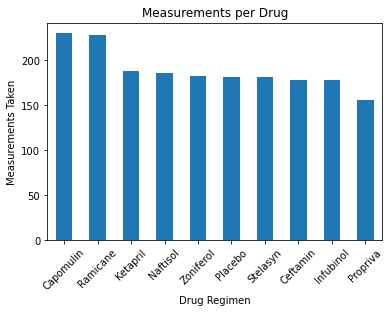

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measure_df['Timepoint'].plot(kind = 'bar')

# rotate the xticks
plt.xticks(rotation = 45)

# Set a title for the chart
plt.title("Measurements per Drug")

# Set labels
plt.xlabel('Drug Regimen')
plt.ylabel('Measurements Taken')

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Create an array for x axis and y axis
x_axis = total_measure_df.index
y_axis = total_measure_df['Timepoint']
print(x_axis)
print(y_axis)

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype='object', name='Drug Regimen')
Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Timepoint, dtype: int64


Text(0, 0.5, 'Measurements Taken')

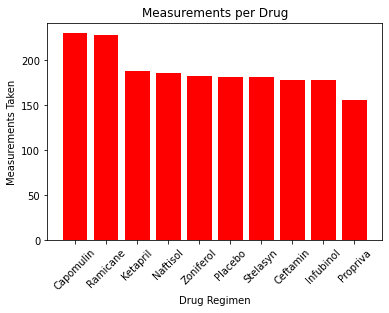

In [30]:
# Tell matplotlib that we will be making a bar chart
plt.bar(x_axis, y_axis, color='red', align="center")

# rotate the xticks
plt.xticks(rotation = 45)

# Set a title for the chart
plt.title("Measurements per Drug")

# Set labels
plt.xlabel('Drug Regimen')
plt.ylabel('Measurements Taken')

In [34]:
# Prep data for gender plotting
gender_df = clean_df.groupby('Sex').count()
gender_df

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958


<AxesSubplot:ylabel='Mouse ID'>

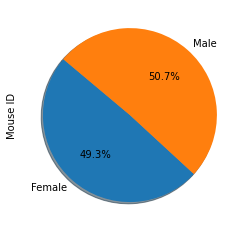

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df['Mouse ID'].plot(kind = 'pie', shadow=True, startangle=140,autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x219e2cf4850>,
 [Text(-0.7265028750894215, -0.8259501029038041, 'Female'),
  Text(0.7265029524204479, 0.8259500348836922, 'Male')],
 [Text(-0.3962742955033208, -0.45051823794752943, '49.3%'),
  Text(0.39627433768388065, 0.4505182008456502, '50.7%')])

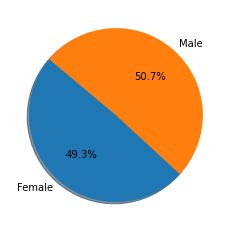

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Make arrays
sizes = gender_df['Mouse ID']
labels = gender_df.index

# Create pyplot pie plot...good luck saying that out loud
plt.pie(sizes, labels = labels, shadow=True, startangle=140,autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [25]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
